<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DATA%20602/Data_605_HW5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

In [4]:
#importing the data

mlb_1=pd.read_csv("https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/data_files_DATA602/mlb.csv")
mlb_1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
mlb_1.shape

(322, 20)

In [6]:
mlb_1.drop(['League','Division','NewLeague'],axis=1,inplace=True)

In [7]:
mlb_1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [8]:
X_numerical=mlb_1.drop(['Salary'],axis=1).astype('float64')

In [9]:
list_numerical=X_numerical.columns
list_numerical

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

In [10]:
mlb_1.isna().sum()



AtBat       0
Hits        0
HmRun       0
Runs        0
RBI         0
Walks       0
Years       0
CAtBat      0
CHits       0
CHmRun      0
CRuns       0
CRBI        0
CWalks      0
PutOuts     0
Assists     0
Errors      0
Salary     59
dtype: int64

In [11]:
#Dropping the na from Salary column

mlb_2=mlb_1.dropna()
mlb_2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [12]:
X_numerical=mlb_2.drop(['Salary'],axis=1).astype('float64')

In [13]:
X=X_numerical
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [14]:
Y=mlb_2['Salary']
Y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [15]:
#Splitting the train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=3)

In [16]:
X_train.shape,X_test.shape

((197, 16), (66, 16))

In [17]:
Y_train.shape,Y_test.shape

((197,), (66,))

In [18]:
#Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical]) 

X_train[list_numerical] = scaler.transform(X_train[list_numerical])

X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [19]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
134,-1.767308,-1.524881,-0.776763,-1.448808,-0.841986,-1.219131,0.372137,-0.888986,-0.889579,-0.637779,-0.848526,-0.727671,-0.750602,-0.542829,-0.706151,-1.155740
262,-0.864720,-0.878808,-0.776763,-0.505806,-0.363396,0.947948,-0.265350,-0.743089,-0.750217,-0.637779,-0.701068,-0.704660,-0.321717,-0.383216,-0.792471,-1.008087
5,1.316534,1.371307,-0.893842,0.751529,-0.004454,-0.276923,0.797128,0.818742,0.683451,-0.600397,0.444808,0.057986,-0.236713,-0.008309,2.214341,2.387929
218,-0.187779,-0.299571,-0.776763,-0.741557,-1.001516,0.995058,-0.052854,-0.286818,-0.300093,-0.513171,-0.538249,-0.392370,0.126486,1.751151,-0.353678,0.911400
98,0.092570,0.168275,1.798976,1.655239,0.793196,1.277721,-0.902836,-0.856363,-0.836717,-0.276415,-0.615050,-0.655351,-0.603776,-0.038005,-0.799665,-0.269822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.904584,2.574339,2.267293,2.519658,1.790259,-0.324034,-0.902836,-0.304942,-0.191167,-0.401024,-0.289412,-0.385795,-0.634687,0.537346,-0.756505,-0.417475
314,0.044706,0.212832,-0.074289,0.437195,-0.403279,-0.324034,-1.327828,-0.993652,-0.944042,-0.700083,-0.891535,-0.911758,-0.854925,2.441573,-0.296131,0.320789
168,-0.591208,-0.767416,-0.776763,-1.252349,-0.562809,-1.172021,-0.690341,-0.974622,-0.958459,-0.762388,-0.977552,-0.895322,-0.878108,-0.212466,-0.706151,-0.860434
307,-0.837369,-0.856530,-0.893842,-0.780849,-0.802104,-0.418254,-0.690341,-0.562755,-0.562799,-0.450867,-0.541321,-0.560020,-0.375811,-0.561389,0.430395,0.025483


LASSO

In [20]:
from sklearn import linear_model

In [21]:
lasso_reg = linear_model.Lasso(alpha=1, max_iter=2000)

In [22]:
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=1, max_iter=2000)

In [23]:
print(lasso_reg.coef_)


[-234.50945946  293.39801934   94.72450846  -84.87364047  -87.32746068
  139.17165468   19.78366062 -585.67096672  233.80929541   -0.
  553.81480903  175.62987847 -249.20836442   69.40519926   59.86309121
  -20.03592352]


In [24]:
print(lasso_reg.intercept_)

520.9668781725888


In [29]:
print('R squared for training set', round(lasso_reg.score(X_train, Y_train)*100, 2))
print('R squared for test set', round(lasso_reg.score(X_test, Y_test)*100, 2))

R squared for training set 21.85
R squared for test set 27.7


In [31]:
#MSE for the training and test set.

from sklearn.metrics import mean_squared_error

# Training data
pred_train = lasso_reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE for training set', round(mse_train, 2))

# Test data
pred = lasso_reg.predict(X_test)
mse_test =mean_squared_error(Y_test, pred)
print('MSE for test set', round(mse_test, 2))

MSE for training set 129402.86
MSE for test set 224829.73


Printing the top 5 predictions on training and test dataset

In [92]:
print(lasso_reg.predict(X_train)[0:5])
print(lasso_reg.predict(X_test)[0:5])

[520.96687817 520.96687817 520.96687817 520.96687817 520.96687817]
[520.96687817 520.96687817 520.96687817 520.96687817 520.96687817]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. Y

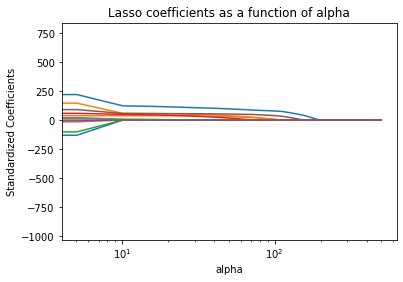

In [69]:
#Plotting alphas and coefficients with a log X scale

alpha_values=np.linspace(0,1000,100)*0.5
lasso_reg=linear_model.Lasso(max_iter=10000,normalize=False,tol=0.0001)
coefs=[]


for a in alpha_values:
  lasso_reg.set_params(alpha=a)
  lasso_reg.fit(X_train,Y_train)
  coefs.append(lasso_reg.coef_)


ax = plt.gca()

ax.plot(alpha_values, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

Use the LassoCV algorithm to find the optimal alpha value using cross-validation = 10 with max_iter=100000

In [77]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=10, random_state=0, max_iter=100000)

# Fit model
model.fit(X_train, Y_train)

LassoCV(cv=10, max_iter=100000, random_state=0)

Alpha value of the LassoCV model

In [76]:
model.alpha_

0.2969043496525405

Using the best value of alpha in the lasso model

In [80]:
lasso_reg_2 = linear_model.Lasso(alpha=model.alpha_)
lasso_reg_2.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.785e+05, tolerance: 3.262e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.2969043496525405)

In [81]:
#R squared value for the training and test dataset

print('R squared for training set', round(lasso_reg_2.score(X_train, Y_train)*100, 2))
print('R squared for test set', round(lasso_reg_2.score(X_test, Y_test)*100, 2))

R squared for training set 45.54
R squared for test set 55.73


In [82]:
#MSE of the tuned model

mean_squared_error(Y_test, lasso_reg_2.predict(X_test))

137657.68799513372

In [85]:
print(lasso_reg_2.predict)

<bound method LinearModel.predict of Lasso(alpha=0.2969043496525405)>


Printing the predictions of the tuned model

In [91]:
lasso_reg_2.predict(X_test)[0:5]

array([ 808.74867257,  187.58595889, 1435.87355819,  355.29285549,
        299.18892583])